# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [61]:
%matplotlib inline
# import numpy and pandas

import numpy as np
import pandas as pd

# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [145]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [146]:
# Your code here:
fifa.head(3)


,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0


In [147]:
fifa.dtypes

Name               object
Age                 int64
Nationality        object
Overall             int64
Potential           int64
Club               object
Value              object
Preferred Foot     object
Position           object
Weak Foot         float64
Acceleration      float64
SprintSpeed       float64
Stamina           float64
Strength          float64
LongShots         float64
Aggression        float64
Interceptions     float64
Positioning       float64
Vision            float64
Penalties         float64
dtype: object

Player's values are expressed in euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell and assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions or thousands but converting them carefully into the same scale. 

In [148]:
# Your code here:
fifa['ValueNumeric1'] = fifa['Value'].str.replace('\W', '', regex=True)

In [149]:
fifa['ValueNumeric'] = fifa['ValueNumeric1'].str.replace('[A-Z]', '', regex=True)

In [150]:
fifa.drop(['ValueNumeric1'], axis=1, inplace = True)

In [154]:
fifa = fifa.rename(columns = {'Preferred Foot':'Preferred_Foot'})

In [155]:
fifa.head(3)

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred_Foot,Position,Weak Foot,...,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumeric
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,...,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,1105
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,...,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,...,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,1185


#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [176]:
fifa_2 = fifa[['Preferred_Foot', 'Position']]
fifa_2.head(2)


,Preferred_Foot,Position
0,Left,RF
1,Right,ST


In [177]:
# Your code here:
import statsmodels.api as sm
from statsmodels.formula.api import ols

fifa_2['Position_count'] = fifa_2.groupby('Position').cumcount()
fifa_2['Preferred_Foot_count'] = fifa_2.groupby('Preferred_Foot').cumcount()
fifa_2

C:\Users\tllt1\AppData\Local\Temp\ipykernel_5780\1701259529.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa_2['Position_count'] = fifa_2.groupby('Position').cumcount()
C:\Users\tllt1\AppData\Local\Temp\ipykernel_5780\1701259529.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa_2['Preferred_Foot_count'] = fifa_2.groupby('Preferred_Foot').cumcount()


,Preferred_Foot,Position,Position_count,Preferred_Foot_count
0,Left,RF,0,0
1,Right,ST,0,0
2,Right,LW,0,1
3,Right,GK,0,2
4,Right,RCM,0,3
...,...,...,...,...
18202,Right,CM,1392,13943
18203,Right,ST,2150,13944
18204,Right,ST,2151,13945
18205,Right,RW,369,13946


In [178]:
fifa_pivot = fifa_2.pivot(index='Position_count', columns='Position', values='Preferred_Foot_count')
#fifa_pivot = fifa_2.pivot(index='Preferred_Foot_count', columns='Preferred_Foot', values='Position')

fifa_pivot

Position,NaN,CAM,CB,CDM,CF,CM,GK,LAM,LB,LCB,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
Position_count,,,,,,,,,,,,,,,,,,,,,
0,3801.0,3.0,11.0,15.0,203.0,47.0,2.0,7.0,8.0,5.0,...,49.0,7.0,3.0,33.0,0.0,19.0,6.0,16.0,333.0,0.0
1,1627.0,23.0,11.0,20.0,220.0,57.0,8.0,97.0,13.0,26.0,...,92.0,28.0,5.0,100.0,36.0,6.0,81.0,42.0,345.0,9.0
2,5998.0,43.0,53.0,52.0,89.0,91.0,14.0,359.0,18.0,32.0,...,101.0,39.0,38.0,150.0,390.0,30.0,113.0,21.0,383.0,13.0
3,7460.0,46.0,63.0,54.0,281.0,102.0,4.0,528.0,25.0,14.0,...,145.0,44.0,59.0,168.0,203.0,103.0,200.0,24.0,489.0,18.0
4,8013.0,20.0,76.0,88.0,303.0,123.0,17.0,553.0,27.0,41.0,...,162.0,50.0,23.0,223.0,406.0,34.0,91.0,67.0,584.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13921.0
2148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13933.0
2149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4209.0


In [179]:
fifa_pivot.columns = ['Position_'+str(x) for x in fifa_pivot.columns.values]
#fifa_pivot.columns = ['Preferred_Foot_'+str(x) for x in fifa_pivot.columns.values]
fifa_pivot.head()

,Position_nan,Position_CAM,Position_CB,Position_CDM,Position_CF,Position_CM,Position_GK,Position_LAM,Position_LB,Position_LCB,...,Position_RB,Position_RCB,Position_RCM,Position_RDM,Position_RF,Position_RM,Position_RS,Position_RW,Position_RWB,Position_ST
Position_count,,,,,,,,,,,,,,,,,,,,,
0,3801.0,3.0,11.0,15.0,203.0,47.0,2.0,7.0,8.0,5.0,...,49.0,7.0,3.0,33.0,0.0,19.0,6.0,16.0,333.0,0.0
1,1627.0,23.0,11.0,20.0,220.0,57.0,8.0,97.0,13.0,26.0,...,92.0,28.0,5.0,100.0,36.0,6.0,81.0,42.0,345.0,9.0
2,5998.0,43.0,53.0,52.0,89.0,91.0,14.0,359.0,18.0,32.0,...,101.0,39.0,38.0,150.0,390.0,30.0,113.0,21.0,383.0,13.0
3,7460.0,46.0,63.0,54.0,281.0,102.0,4.0,528.0,25.0,14.0,...,145.0,44.0,59.0,168.0,203.0,103.0,200.0,24.0,489.0,18.0
4,8013.0,20.0,76.0,88.0,303.0,123.0,17.0,553.0,27.0,41.0,...,162.0,50.0,23.0,223.0,406.0,34.0,91.0,67.0,584.0,9.0


In [182]:
model = ols('Preferred_Foot_count ~ Position_count', data = fifa_2).fit()
#model = ols('Position ~ C(Preferred_Foot)', data = fifa_2).fit()


In [184]:
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
Position_count,1.633410e+11,1.0,20187.984352,0.0
Residual,1.472967e+11,18205.0,NaN,NaN


After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [186]:
fifa.head(2)

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred_Foot,Position,Weak Foot,...,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumeric
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,...,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,1105
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,...,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77


In [205]:
# Your code here:
fifa_3 = fifa[['Nationality', 'ValueNumeric']]
fifa_3.head(2)


,Nationality,ValueNumeric
0,Argentina,1105
1,Portugal,77


In [206]:
fifa_3['ValueNumeric_count'] = fifa_3.groupby('Nationality').cumcount()
fifa_3.head(2)

C:\Users\tllt1\AppData\Local\Temp\ipykernel_5780\516632055.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa_3['ValueNumeric_count'] = fifa_3.groupby('Nationality').cumcount()


,Nationality,ValueNumeric,ValueNumeric_count
0,Argentina,1105,0
1,Portugal,77,0


In [208]:
fifa_pivot_3 = fifa_3.pivot(index='ValueNumeric_count', columns='Nationality', values='ValueNumeric')

In [210]:
fifa_pivot_3.columns = ['Nationality'+str(x) for x in fifa_pivot_3.columns.values]
fifa_pivot_3.head()

,NationalityAfghanistan,NationalityAlbania,NationalityAlgeria,NationalityAndorra,NationalityAngola,NationalityAntigua & Barbuda,NationalityArgentina,NationalityArmenia,NationalityAustralia,NationalityAustria,...,NationalityUganda,NationalityUkraine,NationalityUnited Arab Emirates,NationalityUnited States,NationalityUruguay,NationalityUzbekistan,NationalityVenezuela,NationalityWales,NationalityZambia,NationalityZimbabwe
ValueNumeric_count,,,,,,,,,,,,,,,,,,,,,
0,350,17,405,290,10,13,1105,255,105,38,...,13,21,105,18,80,6,225,60,35,12
1,450,20,39,NaN,35,400,89,4,95,22,...,350,12,NaN,14,44,200,9,25,925,7
2,350,39,165,NaN,37,280,645,23,900,225,...,625,12,NaN,85,60,NaN,8,185,11,32
3,220,31,15,NaN,5,160,57,1,7,16,...,725,15,NaN,7,34,NaN,8,8,14,3
4,NaN,2,13,NaN,12,NaN,645,850,6,95,...,170,18,NaN,8,25,NaN,85,75,1,23


In [211]:
model_3 = ols('ValueNumeric_count ~ Nationality', data = fifa_3).fit()
anova_table_3 = sm.stats.anova_lm(model, typ=2)
anova_table_3

,sum_sq,df,F,PR(>F)
Position_count,1.633410e+11,1.0,20187.984352,0.0
Residual,1.472967e+11,18205.0,NaN,NaN


What is your conclusion from this ANOVA?

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [232]:
# Your code here:
fifa.isnull().sum()

Name              0
Age               0
Nationality       0
Overall           0
Potential         0
Club              0
Value             0
Preferred_Foot    0
Position          0
Weak Foot         0
Acceleration      0
SprintSpeed       0
Stamina           0
Strength          0
LongShots         0
Aggression        0
Interceptions     0
Positioning       0
Vision            0
Penalties         0
ValueNumeric      0
dtype: int64

In [233]:
fifa.shape

(17918, 21)

In [234]:
fifa = fifa.dropna()
fifa.shape

(17918, 21)

In [235]:
fifa = fifa.astype({'ValueNumeric': float})
fifa.dtypes

Name               object
Age                 int64
Nationality        object
Overall             int64
Potential           int64
Club               object
Value              object
Preferred_Foot     object
Position           object
Weak Foot         float64
Acceleration      float64
SprintSpeed       float64
Stamina           float64
Strength          float64
LongShots         float64
Aggression        float64
Interceptions     float64
Positioning       float64
Vision            float64
Penalties         float64
ValueNumeric      float64
dtype: object

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [238]:
# Your code here:

import statsmodels.api as sm

X = sm.add_constant(fifa[['Stamina', 'SprintSpeed']])
Y = fifa['ValueNumeric']

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           ValueNumeric   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.045
Date:                Mon, 13 Mar 2023   Prob (F-statistic):             0.0476
Time:                        23:21:26   Log-Likelihood:            -1.2653e+05
No. Observations:               17918   AIC:                         2.531e+05
Df Residuals:                   17915   BIC:                         2.531e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         264.6097     10.110     26.172      

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [11]:
# Your conclusions here:

In [239]:
fifa.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Preferred_Foot', 'Position', 'Weak Foot', 'Acceleration',
       'SprintSpeed', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'ValueNumeric'],
      dtype='object')

Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [240]:
# Your code here:

X = sm.add_constant(fifa.Potential)
Y = fifa['ValueNumeric']

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           ValueNumeric   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     659.1
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          8.77e-143
Time:                        00:14:55   Log-Likelihood:            -1.2621e+05
No. Observations:               17918   AIC:                         2.524e+05
Df Residuals:                   17916   BIC:                         2.524e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        897.1573     24.137     37.169      0.0

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [13]:
# Your conclusions here

Plot a scatter plot of value vs. potential. Do you see a linear relationship?

In [244]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

KeyError: 'ValueNumeric'

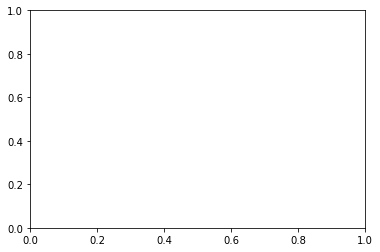

In [260]:
x = np.arange(1, 100)
ax = fifa[['Potential']].plot (x = 'Potential', y = 'ValueNumeric', kind = 'scatter')